In [1]:
import gym
import json
import datetime as dt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from gym import wrappers

import matplotlib.pyplot as plt
import time

### Importing environment and networks

In [2]:
from env.StockTradingEnv import StockTradingEnv
from networks.DQNac import MyModel
from networks.DQNac import StockActor, StockCritic, DQN

### Importing training data

In [6]:
df = pd.read_csv('./data/IBM_train.csv')
df = df.sort_values('Date')

# The algorithms require a vectorized environment to run
env = StockTradingEnv(df)



### Additional functions

In [7]:

def fill_buffer(env, DQN,alpha,sigma):
    
    
    rewards = 0
    iter = 0
    done = False
    observations = env.reset()
    observations = np.expand_dims(observations,axis=0)
    observations = np.expand_dims(observations,axis=0)
    steps = 0
    it=0
    while it<DQN.min_experiences:
        
        #print(it)
        #observations = env.reset()

        action = DQN.act(observations) # observations is actually a single "state" ie past 5 days
        action = tf.squeeze(action)+alpha*np.random.normal(0,sigma)
        #action = np.tanh(tf.squeeze(action)+np.random.normal(0,0.05)) #avoiding small action values in the begining ->[2 0] to frequently
        #print(action)
        action = DQN.convert_action(action)
         
        #print(action)
        prev_observations = observations
        observations, reward, done, _ = env.step(action)
        #print(reward)
        observations = np.expand_dims(observations,axis=0)
        observations = np.expand_dims(observations,axis=0)
        rewards += reward    # sum of gain_net_worth

        if done :
            print("DONE")
#             reward = -200
            env.reset()
        steps += 1
        if steps >= 300: # Limiting the number of steps
            print("STEPS")
            observations = env.reset()
            observations = np.expand_dims(observations,axis=0)
            observations = np.expand_dims(observations,axis=0)
            steps = 0
        
        obs = tf.squeeze(observations)
        obs = np.expand_dims(obs,axis=0)
        prev_observations = tf.convert_to_tensor(prev_observations)
        prev_observations = tf.squeeze(prev_observations, axis=0)
        exp = {'s': prev_observations, 'a': action, 'r': reward, 's2': obs, 'done': done}
        DQN.add_experience(exp)
        
        it += 1
    return " Done "

def DDPG(M,T,lrc,lra,alpha,sigma):                       # M number of episode T lenght of an episode
    
    gamma = 0.9998
    max_experiences = 1000
    min_experiences = 365
    batch_size = 32
    lr_crit = lrc               #learning rate critic optimal 1e-1
    lr_act = lra                #learning rate actor  optimal 1e-3
 
    D = DQN( gamma, max_experiences, min_experiences, batch_size, lr_crit,lr_act)
    a = fill_buffer(env, D,alpha,sigma)
    #print(a)
    table_loss =[]
    table_actions_explored = []
    for i in range(M):
        agent = D.train(env,T,table_loss,table_actions_explored,alpha,sigma)
    print("done")
    return agent,D,table_loss,table_actions_explored



### Function to smooth the graphs

In [8]:
def smoothTriangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

### Train agents

In [9]:
agents = []
table_loss = []
table_actions_explored = []

nbr_agents = 4
nbr_episodes = 1000
lenght_of_an_episode = 100
lrc = 1e-1                   #learning rate critic
lra = 1e-3                   #learning rate actor
alpha = 1                    #alpha=0 no noise adding, alpha=1 gaussian N(0,sigma) noise during the training
sigma = 0.1                  

for i in range(nbr_agents):
    agent ,D,t_loss,ta_explored = DDPG(nbr_episodes,lenght_of_an_episode,lrc,lra,alpha,sigma)
    agents.append(agent)
    table_loss.append(t_loss)
    table_actions_explored.append(ta_explored )
    
    
    


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

STEPS

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you in

C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid 

done

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

STEPS

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If y

C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid 

done

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

STEPS

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If y

C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid 

done

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

STEPS

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If y

C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)
C:\Users\Thomas\PycharmProjects\reinforcement-learning-master\P3A-Deep-Reinforcement-Learning\Stock-Trading-Environment\env\StockTradingEnv.py:107: RuntimeWarning: invalid 

done


###  Print loss of the critic network

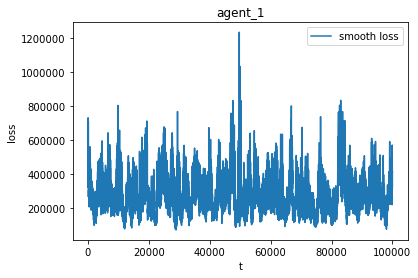

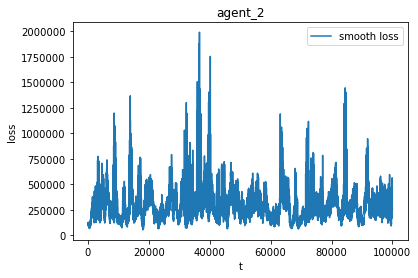

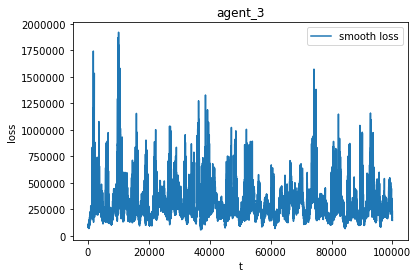

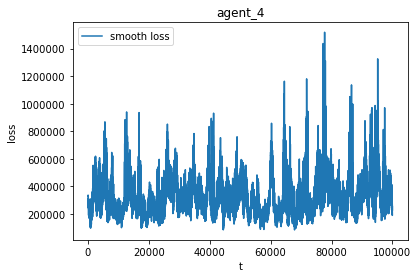

In [34]:
t = np.arange(0, 100000, 1)
table_loss  = np.asarray(table_loss)
count=1
for tl in table_loss:
    s = smoothTriangle(tl, 10)
    #plt.plot(t,table_loss,label="loss")
    plt.plot(t,s,label="smooth loss")
    plt.xlabel("t")
    plt.ylabel("loss")
    plt.legend()
    plt.title("agent_{}".format(count))
    #plt.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac3.0_M1000_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.1/agent_{}_loss.png".format(count))
    plt.show()
   
    count+=1

### Print histogram of actions done during the learning

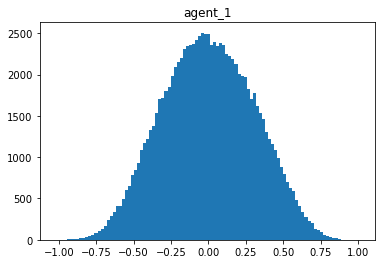

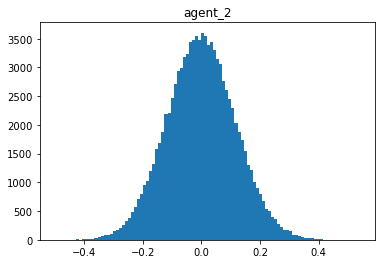

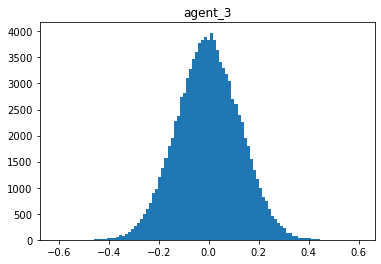

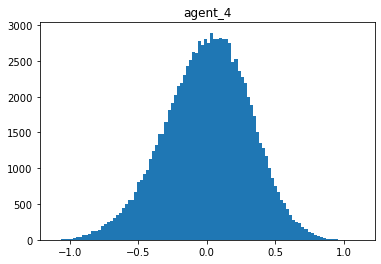

In [35]:
count=1
for ta in table_actions_explored:
    plt.hist(ta, bins = 100)
    plt.title("agent_{}".format(count))
    #plt.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac3.0_M1000_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.1/agent_{}_action_explored_train.png".format(count))
    plt.show()
    count+=1

### Test on validation test

In [44]:
df = pd.read_csv('./data/IBM_val.csv')
df = df.sort_values('Date')
env = StockTradingEnv(df)


df_results = pd.DataFrame(columns=['Date','Index','agent_1','agent_2','agent_3','agent_4','agent_5','agent_6','agent_7','agent_8','agent_9','agent_10','agent_11','agent_12','agent_13','agent_14','agent_15','agent_16','agent_17','agent_18','agent_19','agent_20','action_1','action_2','action_3','action_4','action_5','action_6','action_7','action_8','action_9','action_10','action_11','action_12','action_13','action_14','action_15','action_16','action_17','action_18','action_19','action_20','action_smooth_1','action_smooth_2','action_smooth_3','action_smooth_4','action_smooth_5','action_smooth_6','action_smooth_7','action_smooth_8','action_smooth_9','action_smooth_10','action_smooth_11','action_smooth_12','action_smooth_13','action_smooth_14','action_smooth_15','action_smooth_16','action_smooth_17','action_smooth_18','action_smooth_19','action_smooth_20','agent_mean'], index=df.index)
df_results['Date'] = df['Date']

table_actions = []
last_net_worth = []
# Compute the Index value
for i in range(len(df.loc[:, 'Open'].values) - 6):
    df_results.loc[i+5, "Index"] = df.loc[i+5, "Close"] * env.initial_account_balance / df.loc[5, "Close"] # i + 5 bec
    

count = 1
# Compute the Agents' net_worth
for Agent in agents:
    
    observation = env.reset_to_day_one().astype('float32')
    observation = np.expand_dims(observation,axis=0)
    observation = np.expand_dims(observation,axis=0)
    observation = tf.convert_to_tensor(observation)  
    table_actions_agent=[]
    for i in range(len(df.loc[:, 'Open'].values) - 6):
        action = Agent(observation)
        action = tf.squeeze(action)
        df_results.loc[i+5,'action_{}'.format(count)] = action.numpy()
        table_actions_agent.append(action.numpy())
        #df_results.loc[i+5,'action_smooth'] = 0.8*df_results.loc[i+4,'action_smooth']+0.2*df_results.loc[i+5,'action']
        #print(action)
        action = D.convert_action(action)
        
         
        observation, reward, done, _ = env.step(action)
        observation = np.expand_dims(observation,axis=0)
        observation = np.expand_dims(observation,axis=0)
        observation = tf.convert_to_tensor(observation) 
        df_results.loc[i+5, "agent_{}".format(count)] = env.net_worth   

        print("\r agent_{}, day {} out of {}".format(count, i, len(df.loc[:, 'Open'].values) - 7), end = "")
    print("")
    table_actions.append(table_actions_agent)
    count +=1
    print("last net_worth: {}".format(env.net_worth))
    last_net_worth.append(env.net_worth)
    


 agent_1, day 999 out of 999
last net_worth: 7973.610790000008
 agent_2, day 999 out of 999
last net_worth: 8819.419982
 agent_3, day 999 out of 999
last net_worth: 8711.259783999998
 agent_4, day 999 out of 999
last net_worth: 8633.528976000009


### Print the mean of train agents against the index

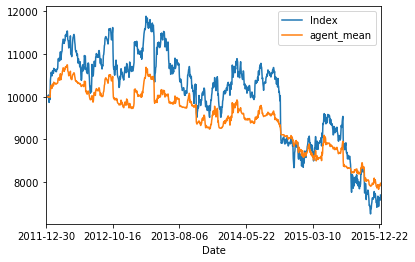

In [45]:
df_results['agent_mean'] = df_results[['agent_1','agent_10']].mean(axis=1)
fig = df_results.plot(x="Date", y=["Index","agent_mean"]).get_figure()
fig.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac3.0_M1000_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.1/IBM_val_agent_mean_over_4.png")

### Print each agent individually against the index

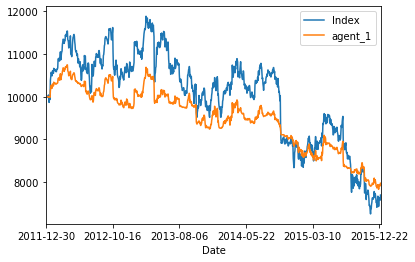

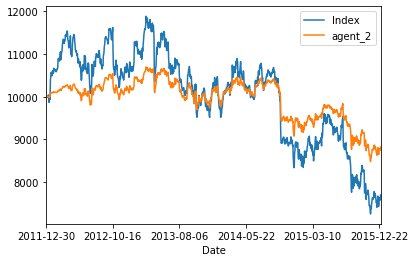

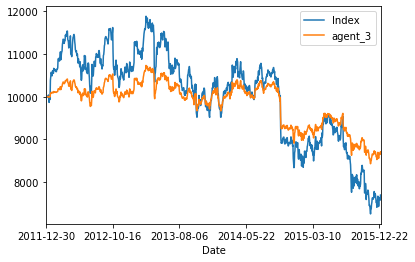

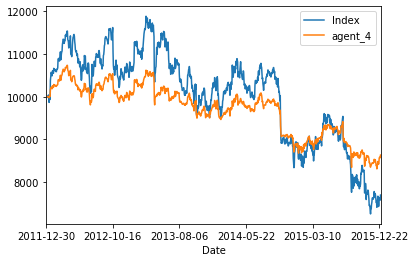

In [46]:

count = 1
for Agent in agents:
    
    fig = df_results.plot(x="Date", y=["Index","agent_{}".format(count)]).get_figure()
    fig.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac3.0_M1000_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.1/agent_{}_IBM_val_last_net_worth={}.png".format(count,last_net_worth[count-1]))
    #df_results['action_smooth_{}'.format(count)] = smoothTriangle(df_results["action_{}".format(count)], 50)
    #df_results['action_smooth'] = df_results["action"].rolling(window=100).mean()
    #fig2 = df_results.plot(x="Date", y=["action_smooth_{}".format(count)]).get_figure()
    #fig2.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac2.0_M50_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.2/agent_{}_action_on_val_smooth.png".format(count))
    count+=1


### Saving an agent

In [53]:
#agents[3].save_weights("save_models_ac/agent4_100000",save_format="tf")

### Print histogram of actions done by the agent

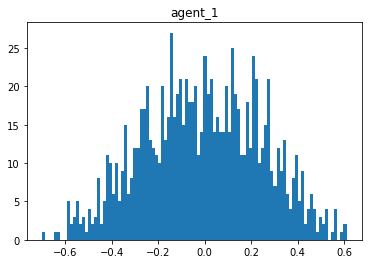

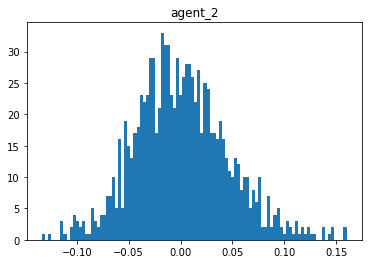

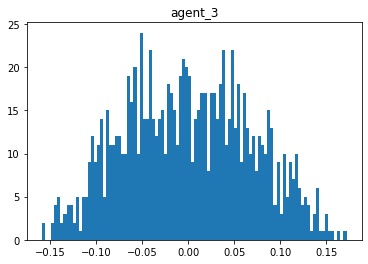

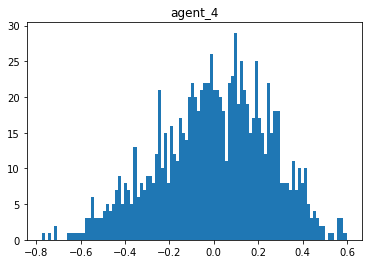

In [47]:
count=1
for ta in table_actions:
    
    plt.hist(ta, bins = 100)
    plt.title("agent_{}".format(count))
    plt.savefig("C:/Users/Thomas/Documents/3A/projet DPRL/ac3.0_M1000_T100_tau(1e-2)_lrc(1e-1)_lrea(1e-3)_alpha=1_sigma=0.1/agent_{}_action_realized_IBM_val.png".format(count))
    plt.show()
    count+=1

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:
decrease = (df_results["Index"][5:-7].values - df_results["Index"][6:-6].values) <= 0
y_true = decrease.astype(int)
t_act = np.array(table_actions[9])
actions = t_act[5:-1] <= 0
y_pred = actions.astype(int)
print(y_true)
print(y_pred)


IndexError: list index out of range

In [23]:
accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [73]:
confusion_matrix(y_true, y_pred)

array([[239, 225],
       [228, 302]], dtype=int64)

In [48]:
count=1
for Agent in agents: 
    diff = df_results["agent_{}".format(count)][5:-1] - df_results["Index"][5:-1]
    score = diff.mean()
    print(score)
    count+=1

-529.826119749341
-82.54913016934213
-173.94702877734255
-338.2813837483364


### Load an agent

In [ ]:
#act = StockActor()
#act.load_weights("save_models_ac/agent_9_10000")